<a href="https://colab.research.google.com/github/nrajmalwar/Project/blob/master/Session_15/Assignment_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Clone the github file
!git clone -q https://github.com/nrajmalwar/Project.git

In [2]:
import tensorflow as tf
tf.enable_eager_execution()

In [3]:
# Import libraries
from Project.Session_15.data import data
from Project.Session_15.loss import loss
from Project.Session_15.model import model
from Project.Session_15.optim_scheduler import optim_scheduler
from Project.Session_15.plots import plots

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
len_train, len_test = len(x_train), len(x_test)
y_train = y_train.astype('int64').reshape(len_train)
y_test = y_test.astype('int64').reshape(len_test)

# Normalize and pad the dataset
x_train = data.normalize(data.pad4(x_train))
x_test = data.normalize(x_test)

170500096/170498071 [==============================] - 4s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


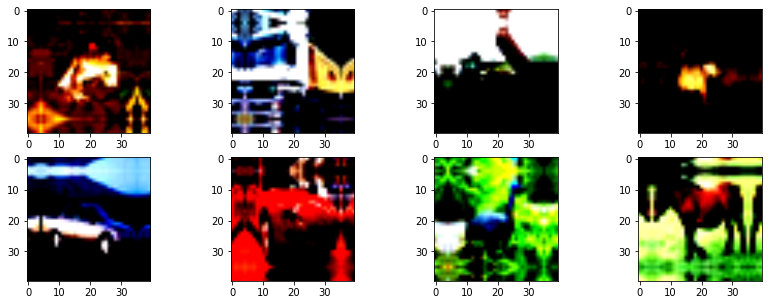

In [5]:
data.plot_image(x_train)

In [0]:
BATCH_SIZE = 512 #@param {type:"integer"}
MOMENTUM = 0.9 #@param {type:"number"}
LEARNING_RATE = 0.4 #@param {type:"number"}
WEIGHT_DECAY = 5e-4 #@param {type:"number"}
EPOCHS = 24 #@param {type:"integer"}


In [7]:
# Call the DavidNet model
model = model.DavidNet()

# Define global step
global_step = tf.train.get_or_create_global_step()

# Call the learning rate function
lr_func = optim_scheduler.lr_func(len_train, BATCH_SIZE, EPOCHS, LEARNING_RATE, global_step)

# Define the optimizer
opt = optim_scheduler.momentum_optimizer(lr_func, MOMENTUM)

In [0]:
# Convert data to TFRecord
original_train_set = data.convert_np_to_tfrecords(x_train, y_train, batch_size=1,filename='train_set.tfrecords')
test_set = data.convert_np_to_tfrecords(x_test, y_test, batch_size=BATCH_SIZE, filename='test_set.tfrecords').batch(BATCH_SIZE)

In [0]:
# Model training
list_train_acc, list_test_acc, list_train_loss, list_test_loss = loss.model_training(model, original_train_set, test_set, EPOCHS, LEARNING_RATE, BATCH_SIZE, WEIGHT_DECAY, opt, global_step, len_train, len_test, optim_scheduler.lr_schedule, optim_scheduler.data_aug)


epoch: 1 lr: 0.08 train loss: 1.574367852783203 train acc: 0.43 val loss: 1.1865283081054687 val acc: 0.5791 time: 45.721673011779785



epoch: 2 lr: 0.16 train loss: 0.8385153265380859 train acc: 0.70356 val loss: 0.8886046447753906 val acc: 0.7013 time: 73.28251719474792



epoch: 3 lr: 0.24 train loss: 0.6284677322387695 train acc: 0.78144 val loss: 1.0362659881591796 val acc: 0.6889 time: 100.46495509147644



epoch: 4 lr: 0.32 train loss: 0.533646646118164 train acc: 0.81496 val loss: 0.5634136825561523 val acc: 0.8044 time: 127.73361706733704



epoch: 5 lr: 0.4 train loss: 0.47850921112060546 train acc: 0.83526 val loss: 0.621067527770996 val acc: 0.7934 time: 154.84367036819458



epoch: 6 lr: 0.37894736842105264 train loss: 0.3930940774536133 train acc: 0.86466 val loss: 0.4283905990600586 val acc: 0.8547 time: 181.66116070747375



epoch: 7 lr: 0.35789473684210527 train loss: 0.3124875540161133 train acc: 0.89188 val loss: 0.5602088012695312 val acc: 0.8153 time: 208.59162545204163



epoch: 8 lr: 0.33684210526315794 train loss: 0.2707509730529785 train acc: 0.9061 val loss: 0.45061431198120117 val acc: 0.853 time: 236.05215907096863



epoch: 9 lr: 0.31578947368421056 train loss: 0.22890560104370117 train acc: 0.91996 val loss: 0.3531943244934082 val acc: 0.8847 time: 263.0955286026001



epoch: 10 lr: 0.2947368421052632 train loss: 0.1990689109802246 train acc: 0.92956 val loss: 0.3543753982543945 val acc: 0.8835 time: 290.062052488327



epoch: 11 lr: 0.2736842105263158 train loss: 0.17616726684570314 train acc: 0.93902 val loss: 0.35371563262939454 val acc: 0.8853 time: 317.4071991443634



epoch: 12 lr: 0.25263157894736843 train loss: 0.1487024217224121 train acc: 0.94828 val loss: 0.32967097778320315 val acc: 0.8959 time: 344.7195403575897



epoch: 13 lr: 0.23157894736842108 train loss: 0.12684028469085692 train acc: 0.95708 val loss: 0.3460534896850586 val acc: 0.8922 time: 371.9273223876953



epoch: 14 lr: 0.2105263157894737 train loss: 0.11289045433044434 train acc: 0.96126 val loss: 0.2781103397369385 val acc: 0.9107 time: 398.95339488983154



epoch: 15 lr: 0.18947368421052635 train loss: 0.09566578784942627 train acc: 0.96756 val loss: 0.32358716735839843 val acc: 0.9027 time: 425.73782110214233



epoch: 16 lr: 0.16842105263157897 train loss: 0.07894941707611083 train acc: 0.9731 val loss: 0.2836364440917969 val acc: 0.9137 time: 452.58841371536255



epoch: 17 lr: 0.1473684210526316 train loss: 0.0672323006439209 train acc: 0.97798 val loss: 0.28497616119384767 val acc: 0.9123 time: 479.57394313812256



epoch: 18 lr: 0.12631578947368421 train loss: 0.05620863498687744 train acc: 0.98198 val loss: 0.2721496379852295 val acc: 0.919 time: 506.3408405780792



epoch: 19 lr: 0.10526315789473689 train loss: 0.04454100442886352 train acc: 0.98674 val loss: 0.2539280033111572 val acc: 0.924 time: 533.2262761592865



epoch: 20 lr: 0.08421052631578951 train loss: 0.03570916877746582 train acc: 0.98914 val loss: 0.2448996696472168 val acc: 0.928 time: 560.2483623027802



epoch: 21 lr: 0.06315789473684214 train loss: 0.030754544429779054 train acc: 0.99148 val loss: 0.2486368293762207 val acc: 0.9261 time: 587.6629393100739



epoch: 22 lr: 0.04210526315789476 train loss: 0.025455515718460085 train acc: 0.9935 val loss: 0.24777251892089844 val acc: 0.931 time: 614.6465504169464



epoch: 23 lr: 0.02105263157894738 train loss: 0.022495000610351562 train acc: 0.99414 val loss: 0.2427497356414795 val acc: 0.9284 time: 641.9399762153625



epoch: 24 lr: 0.0 train loss: 0.02021112036705017 train acc: 0.99522 val loss: 0.2372052707672119 val acc: 0.9308 time: 668.839786529541


In [0]:
train_acc = np.asarray(list_train_acc)/len_train
val_acc = np.asarray(list_test_acc)/len_test
train_loss = np.asarray(list_train_loss)/len_train
val_loss = np.asarray(list_test_loss)/len_test

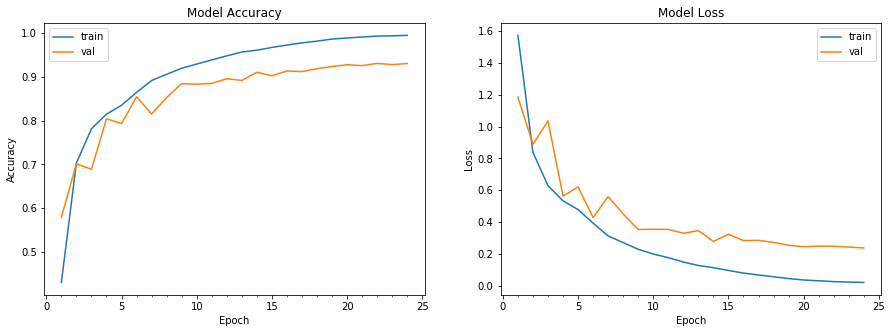

In [0]:
plots.plot_model_history(train_acc, val_acc, train_loss, val_loss)